## About this file 

#### Column Profiling:
#### datetime: datetime
#### season: season (1: spring, 2: summer, 3: fall, 4: winter)
#### holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
#### workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
#### weather: 1: Clear, Few clouds, partly cloudy, partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#### temp: temperature in Celsius
#### atemp: feeling temperature in Celsius
#### humidity: humidity
#### windspeed: wind speed
#### casual: count of casual users
#### registered: count of registered users
#### count: count of total rental bikes including both casual and registered

In [1]:
# data from Kaggel link - https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data/data
# code link - https://www.kaggle.com/code/roggerr/yulu-eda-and-hypthesis-testing-in-details

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,f_oneway, levene, kruskal, shapiro, chi2_contingency
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:/All project/yulu_bike_sharing_dataset.csv")
df.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2923,2011-07-10 17:00:00,3,0,0,1,34.44,37.120,36,15.0013,146,217,363
2419,2011-06-08 17:00:00,2,0,1,1,37.72,42.425,35,15.0013,80,426,506
10448,2012-12-01 18:00:00,4,0,0,2,13.94,18.180,76,0.0000,42,255,297
7183,2012-04-17 16:00:00,2,0,1,1,27.88,31.060,22,23.9994,50,320,370
8816,2012-08-09 17:00:00,3,0,1,1,35.26,37.880,36,16.9979,111,699,810


In [3]:
# Checking of Null values 

df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### There are total 10886 rows and 12 columns
#### The data does not contains any null values. So, no need to handle missing values

In [4]:
# checking duplicate 
df.duplicated().sum()

np.int64(0)

In [5]:
# skewness of each column

df.skew(numeric_only= True)

season       -0.007076
holiday       5.660517
workingday   -0.776163
weather       1.243484
temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64

#### Skewness Analysis of Variable 


Symmetrical Majority:
  The majority of the variable, including 'season' and 'temp',exhibit skewness values close to zero, suggestive relatively 
  symmetrical distribution

Postive skewness Insight 
  variable such as 'holiday','weather','windspeed','casual','registered','count' demonstrate positive skewness

Negative skewness Insight
  In contrast 'workingday','atemp','humidity' demonstrate negative skewness




In [17]:
# uniques values of each columns 

df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [18]:
# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [19]:
# converting the categorical column into category
cat_col = ['season', 'holiday', 'workingday', 'weather']

for i in cat_col:
    df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 723.7+ KB


In [20]:
# converting datetime column into datetime format

df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'].dtype

dtype('<M8[ns]')

In [21]:
# Creating new columns from datetime and converting them to categories

df['year']= df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [22]:
df.shape

(10886, 16)

In [23]:
df.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
1397,2011-04-04 02:00:00,2,0,1,1,15.58,19.695,66,16.9979,1,1,2,2011,4,4,2
6346,2012-03-01 16:00:00,1,0,1,1,23.78,27.275,32,19.9995,38,323,361,2012,3,1,16
5062,2011-12-05 00:00:00,4,0,1,1,13.12,16.665,87,6.0032,3,21,24,2011,12,5,0
3224,2011-08-04 06:00:00,3,0,1,2,27.88,31.820,89,19.9995,7,90,97,2011,8,4,6
1495,2011-04-08 04:00:00,2,0,1,2,13.94,16.665,86,8.9981,0,1,1,2011,4,8,4


In [24]:
# replacing the number with category

# change season
df['season'] = df['season'].replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
# change of holiday
df['holiday'] = df['holiday'].replace({0:'No',1:'Yes'})

# change of workingday
df['workingday'] = df['workingday'].replace({0:'No',1:'Yes'})

# change of month
df['month'] = df['month'].replace({1: 'January',
                                   2: 'February',
                                   3: 'March',
                                   4: 'April',
                                   5: 'May',
                                   6: 'June',
                                   7: 'July',
                                   8: 'August',
                                   9: 'September',
                                   10: 'October',
                                   11: 'November',
                                   12: 'December'})


In [29]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,9.992559,11.541613
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,5.000000,6.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,10.000000,12.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,15.000000,18.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,19.000000,23.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,5.476608,6.915838


In [30]:
df.describe(include = 'category')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,winter,No,Yes,1
freq,2734,10575,7412,7192


Overview and Feature Patterns

Temporal and Numerical Composition:

The dataset encompasses both datetime information and various numerical features associated with bike rentals. The observations span from January 1, 2011, to December 19, 2012.
Diverse Numerical Feature Characteristics:

Numerical features such as temperature, humidity, windspeed, and counts of casual and registered bike rentals show diverse ranges and distributions, highlighting the variability in rental patterns across different conditions.
Temporal Patterns and Concentrations:

Observations on the year, day, and hour variables indicate temporal patterns, with a concentration in 2011 and 2012, a mean day value around 10, and an hourly distribution ranging from 0 to 23.

# Outlier Detection

In [30]:
cat_col

['season', 'holiday', 'workingday', 'weather']

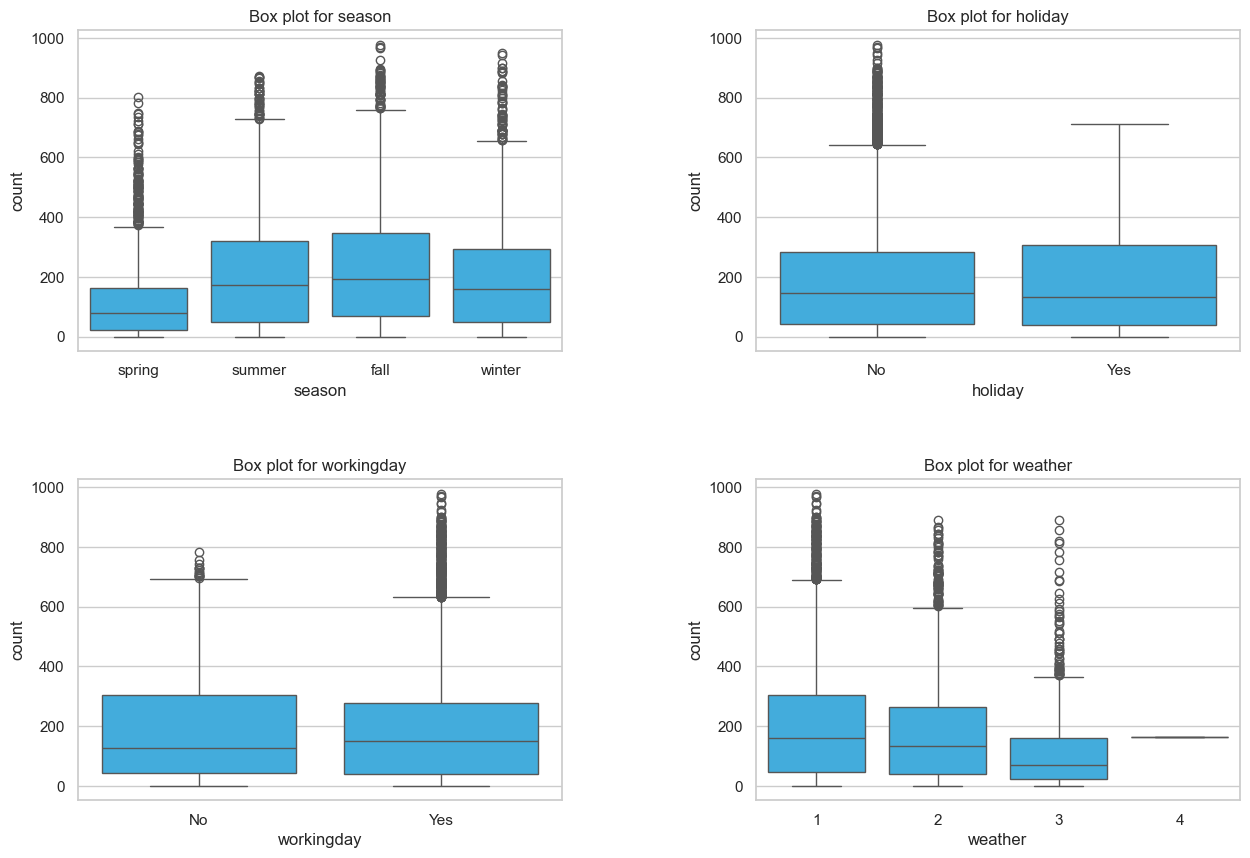

In [32]:
plt.figure(figsize=(15,10))
for i in enumerate(cat_col):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(data=df,x=i[1], y= 'count', color= "#29B6F6")
    plt.title(f"Box plot for {i[1]}")
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.show()

Outlier Analysis

Outliers in Different Seasons:

In spring and winter, there are more unusual values in the data compared to other seasons.
Weather Outliers:

Category 3 weather has a lot of unusual values, while category 4 weather doesn't have any.
Working Days vs. Holidays:

On regular working days, there are more unusual values in the data than on holidays. This suggests some unexpected patterns during typical workdays that might need a closer look.

# Univariate Analysis

In [33]:
# Time span of data
time_span = df['datetime'].max() - df['datetime'].min()
time_span

Timedelta('718 days 23:00:00')

In [37]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [35]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,spring,No,No,1,9.84,14.395,81,0.0,3,13,16,2011,January,1,0
1,2011-01-01 01:00:00,spring,No,No,1,9.02,13.635,80,0.0,8,32,40,2011,January,1,1
2,2011-01-01 02:00:00,spring,No,No,1,9.02,13.635,80,0.0,5,27,32,2011,January,1,2
3,2011-01-01 03:00:00,spring,No,No,1,9.84,14.395,75,0.0,3,10,13,2011,January,1,3
4,2011-01-01 04:00:00,spring,No,No,1,9.84,14.395,75,0.0,0,1,1,2011,January,1,4


In [44]:
cols=['season', 'holiday', 'workingday', 'weather','year', 'month', 'day']

for i in cols:
    if i=="day":
        print(df[i].value_counts().sort_index())
    else:
        print(df[i].value_counts())
    print()
    print("-"*60)
    print()
  

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

------------------------------------------------------------

holiday
No     10575
Yes      311
Name: count, dtype: int64

------------------------------------------------------------

workingday
Yes    7412
No     3474
Name: count, dtype: int64

------------------------------------------------------------

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

------------------------------------------------------------

year
2012    5464
2011    5422
Name: count, dtype: int64

------------------------------------------------------------

month
August       912
July         912
June         912
May          912
December     912
October      911
November     911
April        909
September    909
February     901
March        901
January      884
Name: count, dtype: int64

------------------------------------------------------------

day
1     575
2     573
3     573
4     5

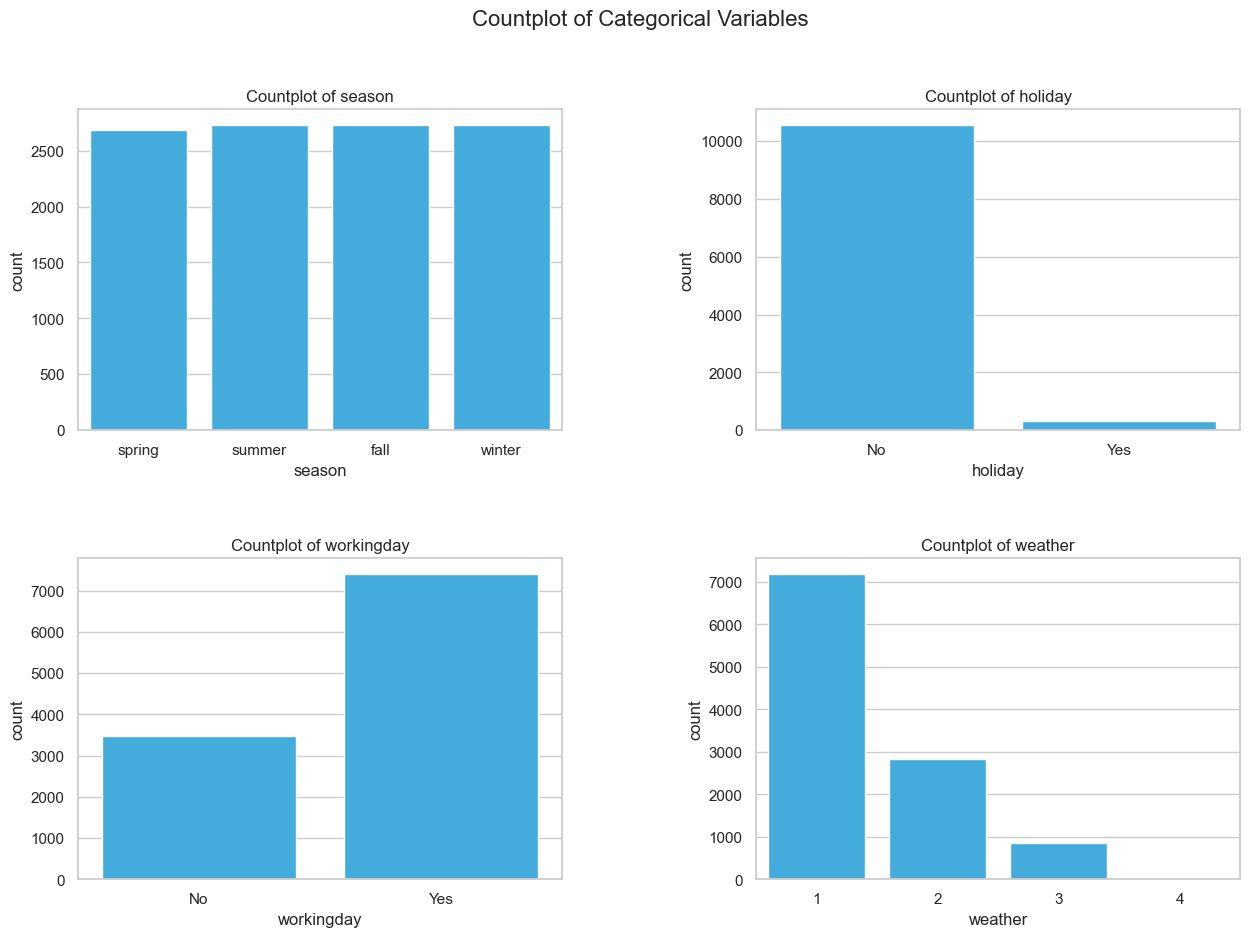

In [52]:
# countplot on categories

plt.figure(figsize=(15,10))
plt.suptitle("Countplot of Categorical Variables",fontsize=(16))

for i in enumerate(cat_col):
    plt.subplot(2,2,i[0]+1)
    sns.countplot(data=df, x=i[1],color= "#29B6F6")
    plt.title(f"Countplot of {i[1]}")
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.show()
    

In [53]:
num_col=df.select_dtypes(include=np.number).columns.difference(['year', 'day', 'hour'])
num_col

Index(['atemp', 'casual', 'count', 'humidity', 'registered', 'temp',
       'windspeed'],
      dtype='object')

In [54]:
# Function for histogram & boxplot on numerical columns

def hist_box(column):
    plt.figure(figsize=(10,5))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram for {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[column], color="#29B6F6")
    plt.title(f'Boxplot for {column}')

    tabular_data = df[column].describe().reset_index()
    tabular_data.columns = ['Statistic', 'Value']
    display(tabular_data)

    plt.tight_layout()
    plt.show()



This visualization for atemp



,Statistic,Value
0,count,10886.000000
1,mean,23.655084
2,std,8.474601
3,min,0.760000
4,25%,16.665000
5,50%,24.240000
6,75%,31.060000
7,max,45.455000


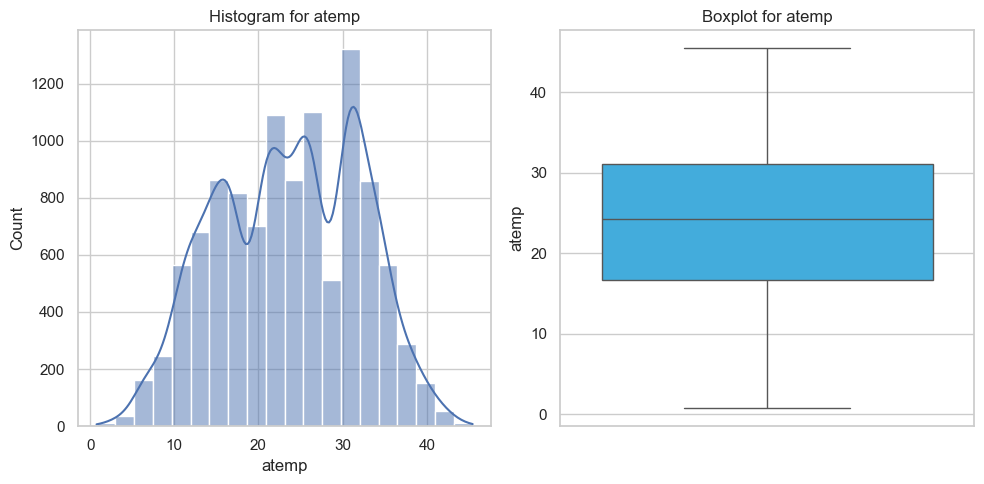


This visualization for casual



,Statistic,Value
0,count,10886.000000
1,mean,36.021955
2,std,49.960477
3,min,0.000000
4,25%,4.000000
5,50%,17.000000
6,75%,49.000000
7,max,367.000000


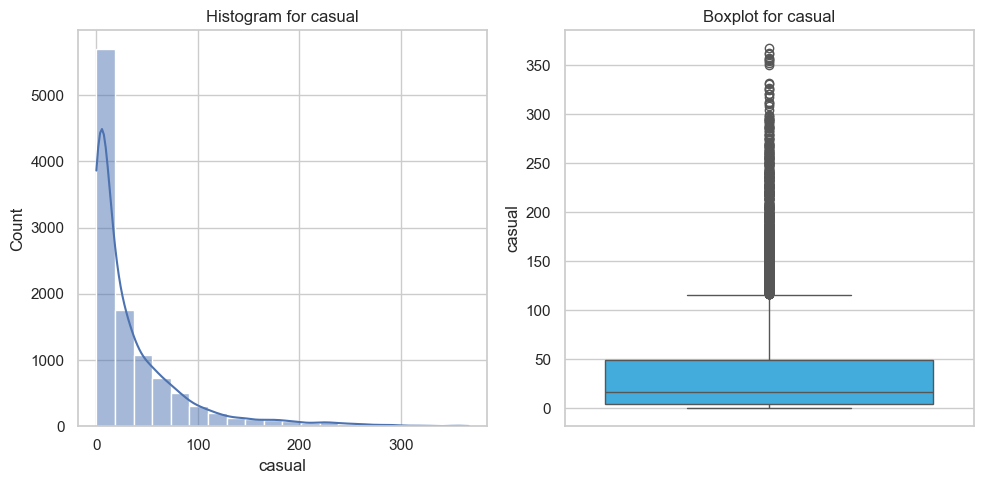


This visualization for count



,Statistic,Value
0,count,10886.000000
1,mean,191.574132
2,std,181.144454
3,min,1.000000
4,25%,42.000000
5,50%,145.000000
6,75%,284.000000
7,max,977.000000


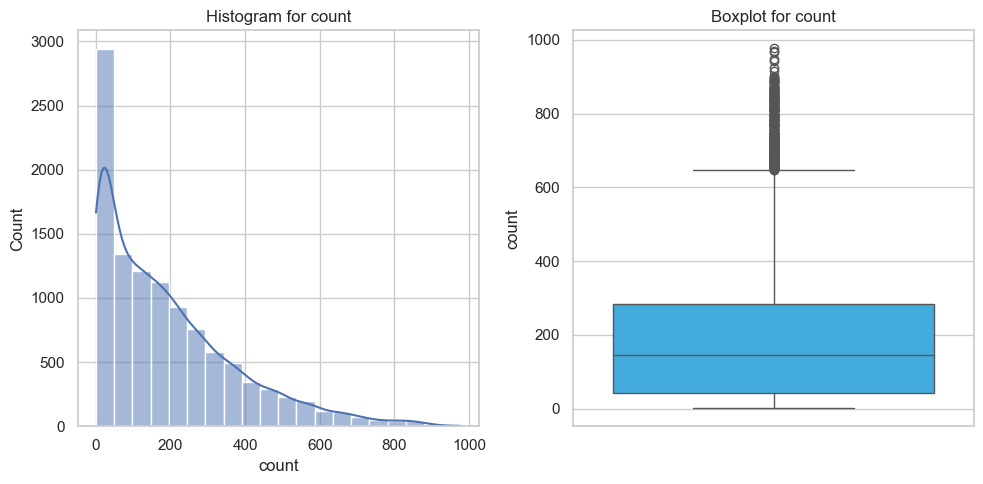


This visualization for humidity



,Statistic,Value
0,count,10886.000000
1,mean,61.886460
2,std,19.245033
3,min,0.000000
4,25%,47.000000
5,50%,62.000000
6,75%,77.000000
7,max,100.000000


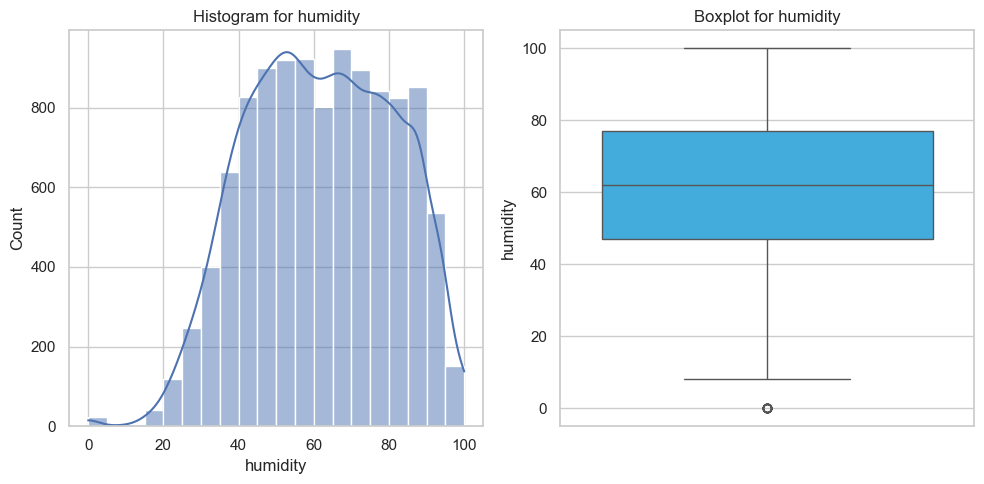


This visualization for registered



,Statistic,Value
0,count,10886.000000
1,mean,155.552177
2,std,151.039033
3,min,0.000000
4,25%,36.000000
5,50%,118.000000
6,75%,222.000000
7,max,886.000000


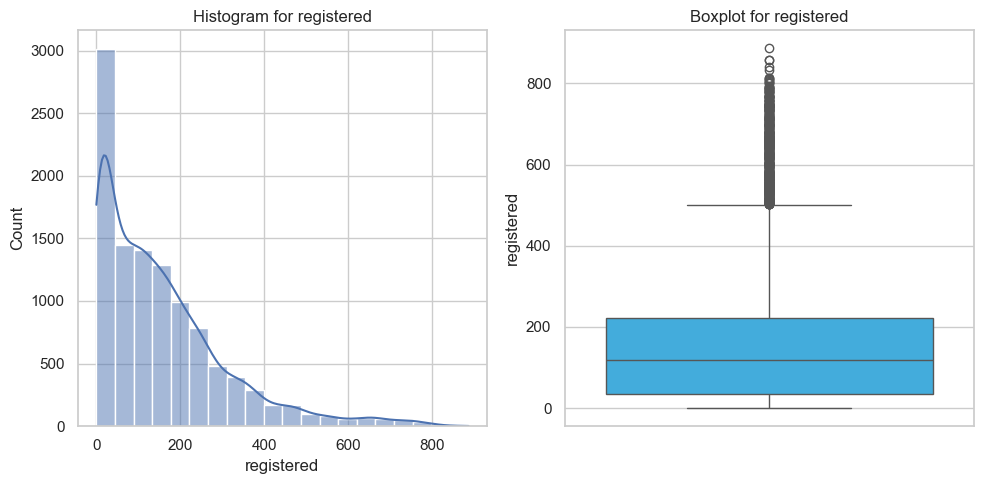


This visualization for temp



,Statistic,Value
0,count,10886.00000
1,mean,20.23086
2,std,7.79159
3,min,0.82000
4,25%,13.94000
5,50%,20.50000
6,75%,26.24000
7,max,41.00000


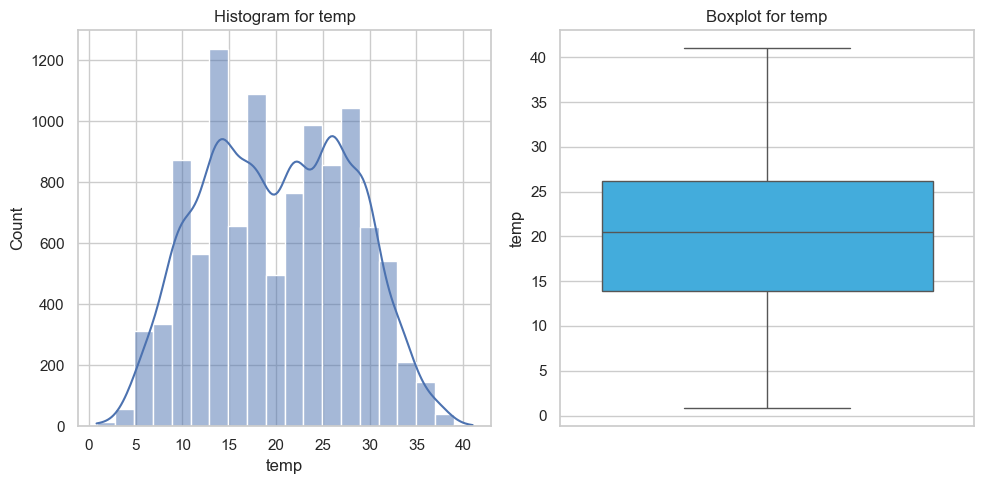


This visualization for windspeed



,Statistic,Value
0,count,10886.000000
1,mean,12.799395
2,std,8.164537
3,min,0.000000
4,25%,7.001500
5,50%,12.998000
6,75%,16.997900
7,max,56.996900


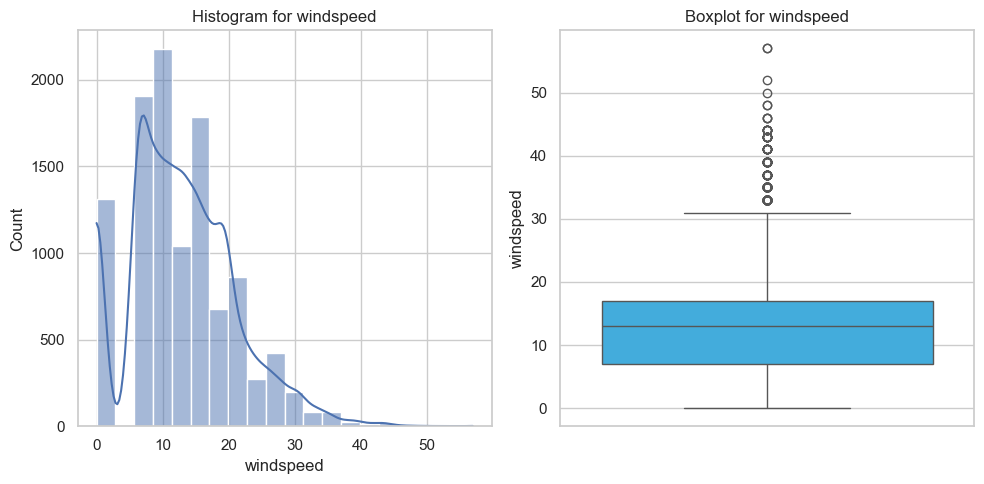

In [57]:
for column in num_col:
    print()
    print(f'This visualization for {column}')
    print()
    hist_box(column)

# Numerical column analysis

Temp:

The 'temp' column shows a diverse temperature range (0.82 to 41.0), with a median of 20.5 and moderate variability around the mean of approximately 20.23 degrees Celsius.
Atemp

The 'atemp' column displays a wide range of apparent temperatures (0.76 to 45.455), with a mean of approximately 23.66 and moderate variability around the median of 24.24.
Humidity

The 'humidity' column depicts a range of humidity values (0 to 100), with an average around 61.89. The distribution shows moderate variability, from 47 at the 25th percentile to 77 at the 75th percentile, indicating diverse humidity levels in the dataset.
WindSpeed

The 'windspeed' column displays a range of wind speeds from 0 to 56.9979, with a mean of approximately 12.80.
Casual

The 'casual' column demonstrates a broad range of casual bike rental counts, with values spanning from 0 to 367. The distribution is positively skewed, as indicated by the mean (36.02) being less than the median (17.0).
Registered

The 'registered' column showcases a diverse range of registered bike rental counts, ranging from 0 to 886. The distribution is positively skewed, evidenced by the mean (155.55) being less than the median (118.0).
Count

The 'count' column reveals a wide range of total bike rental counts, varying from 1 to 977. The distribution is positively skewed, with a mean (191.57) greater than the median (145.0), indicating a concentration of lower values

# Bivariate Analysis

In [58]:
cat_col

['season', 'holiday', 'workingday', 'weather']

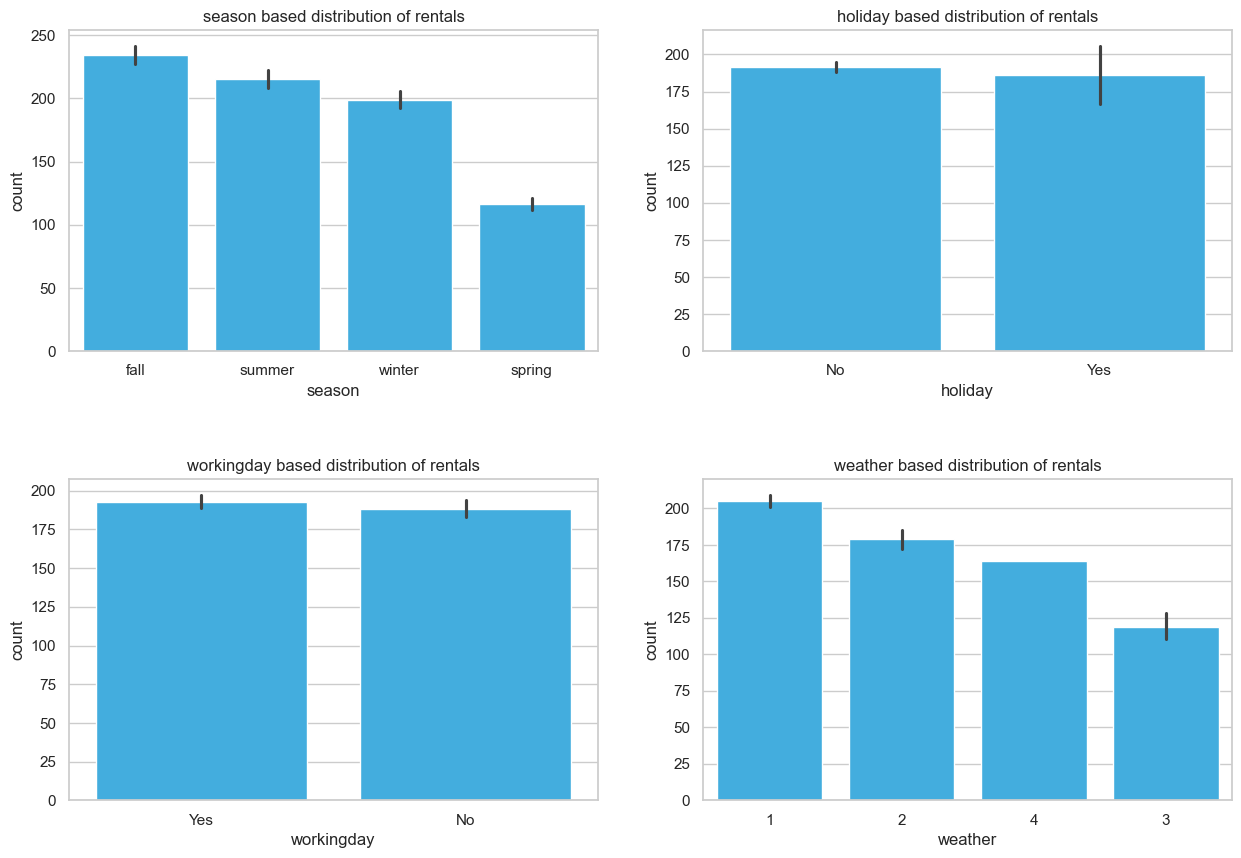

In [60]:
plt.figure(figsize=(15,10))
for i in enumerate(cat_col):
   plt.subplot(2,2,i[0]+1)
   sns.barplot(data=df,x=i[1],y='count', color="#29B6F8", order=df.groupby(i[1])['count'].mean().sort_values(ascending=False).index)
   plt.title(f'{i[1]} based distribution of rentals')
plt.subplots_adjust(hspace=0.4)
plt.show()

In [61]:
num_col

Index(['atemp', 'casual', 'count', 'humidity', 'registered', 'temp',
       'windspeed'],
      dtype='object')

In [62]:
# corrrelation analysis

df[num_col].corr()

,atemp,casual,count,humidity,registered,temp,windspeed
atemp,1.000000,0.462067,0.389784,-0.043536,0.314635,0.984948,-0.057473
casual,0.462067,1.000000,0.690414,-0.348187,0.497250,0.467097,0.092276
count,0.389784,0.690414,1.000000,-0.317371,0.970948,0.394454,0.101369
humidity,-0.043536,-0.348187,-0.317371,1.000000,-0.265458,-0.064949,-0.318607
registered,0.314635,0.497250,0.970948,-0.265458,1.000000,0.318571,0.091052
temp,0.984948,0.467097,0.394454,-0.064949,0.318571,1.000000,-0.017852
windspeed,-0.057473,0.092276,0.101369,-0.318607,0.091052,-0.017852,1.000000


<Axes: >

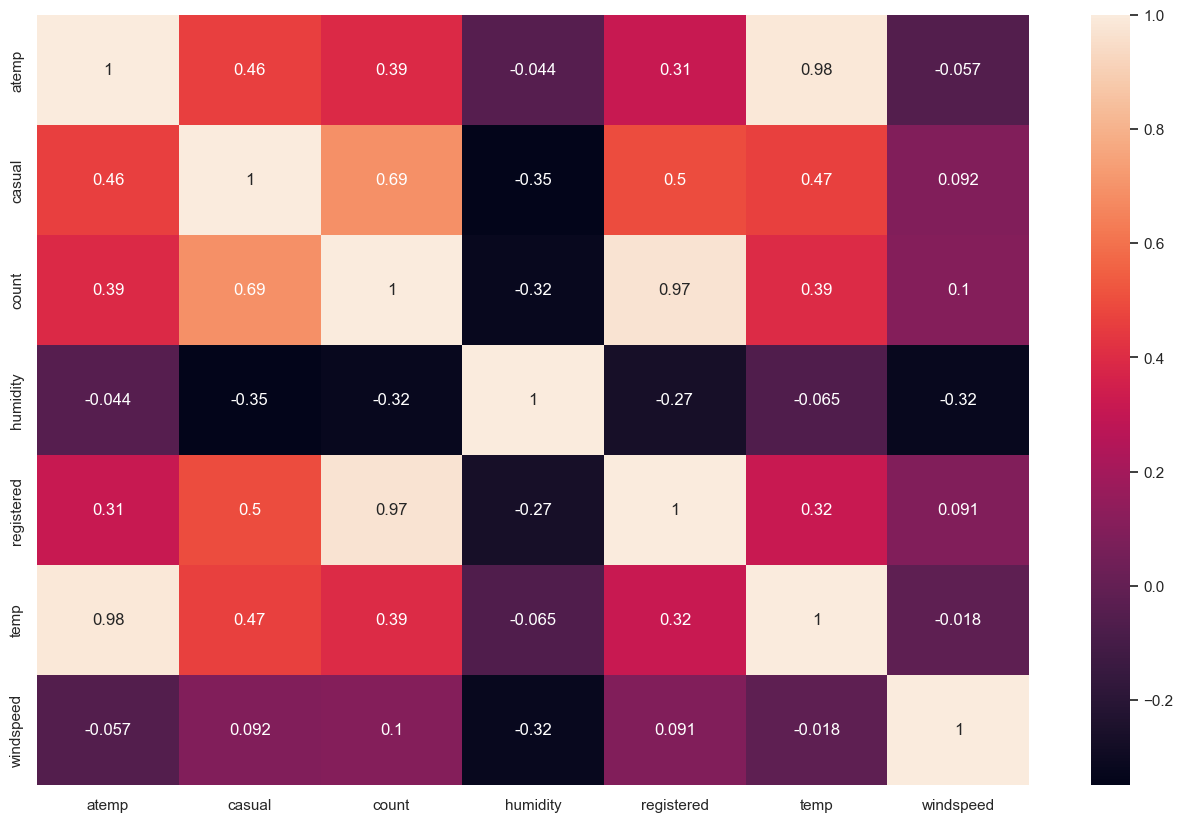

In [63]:
# correlation chart
plt.figure(figsize=(16,10))
sns.heatmap(df[num_col].corr(),annot=True)

# Correlation Analysis

Correlation Analysis

Atemp:

Strong positive correlation with 'temp' (0.98), indicating a close relationship.
Moderate positive correlation with 'casual' (0.46) and 'registered' (0.31).
Positive correlation with 'count' (0.39), suggesting a relationship with overall bike rentals.
Temp (Temperature):

Highly correlated with 'atemp' (0.98), indicating a strong connection.
Moderate positive correlation with 'casual' (0.47) and 'registered' (0.32).
Positive correlation with 'count' (0.39), showing a relationship with overall bike rentals.
Humidity:

Weak negative correlation with 'atemp' (-0.04) and 'temp' (-0.06).
Moderate negative correlation with 'casual' (-0.35), 'registered' (-0.27), and 'count' (-0.32).
Indicates a tendency for fewer bike rentals during higher humidity.
Windspeed:

Weak negative correlation with 'atemp' (-0.06) and 'temp' (-0.02).
Weak positive correlation with 'casual' (0.09), 'registered' (0.09), and 'count' (0.10).
Suggests a subtle influence on bike rentals with increasing wind speed.
Casual (Casual Bike Rentals):

Strong positive correlation with 'atemp' (0.46) and 'temp' (0.47).
Moderate negative correlation with 'humidity' (-0.35) and positive correlation with 'windspeed' (0.09).
Highly correlated with 'registered' (0.50) and 'count' (0.69), indicating a significant impact on overall rentals.
Registered (Registered Bike Rentals):

Positive correlation with 'atemp' (0.31) and 'temp' (0.32).
Negative correlation with 'humidity' (-0.27) and positive correlation with 'windspeed' (0.09).
Highly correlated with 'casual' (0.50) and 'count' (0.97), emphasizing a substantial impact on overall rentals.
Count (Total Bike Rentals):

Positive correlation with 'atemp' (0.39), 'temp' (0.39), and 'casual' (0.69).
Negative correlation with 'humidity' (-0.32).
Highly correlated with 'registered' (0.97), emphasizing the joint impact of casual and registered rentals on the overall count.


In [64]:
df.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
10443,2012-12-01 13:00:00,winter,No,No,2,13.94,18.180,76,0.0000,123,386,509,2012,December,1,13
1580,2011-04-11 18:00:00,summer,No,Yes,1,29.52,33.335,51,26.0027,93,290,383,2011,April,11,18
4217,2011-10-07 18:00:00,winter,No,Yes,1,22.96,26.515,60,6.0032,94,371,465,2011,October,7,18
7233,2012-04-19 18:00:00,summer,No,Yes,1,24.60,31.060,43,6.0032,99,677,776,2012,April,19,18
8329,2012-07-08 10:00:00,fall,No,No,1,36.90,43.180,45,0.0000,85,234,319,2012,July,8,10


In [68]:
monthly_count = df.groupby('month')['count'].sum().reset_index()

monthly_count = monthly_count.sort_values(by='count', ascending=False)

monthly_count

,month,count
6,June,220733
5,July,214617
1,August,213516
11,September,212529
10,October,207434
8,May,200147
9,November,176440
0,April,167402
2,December,160160
7,March,133501


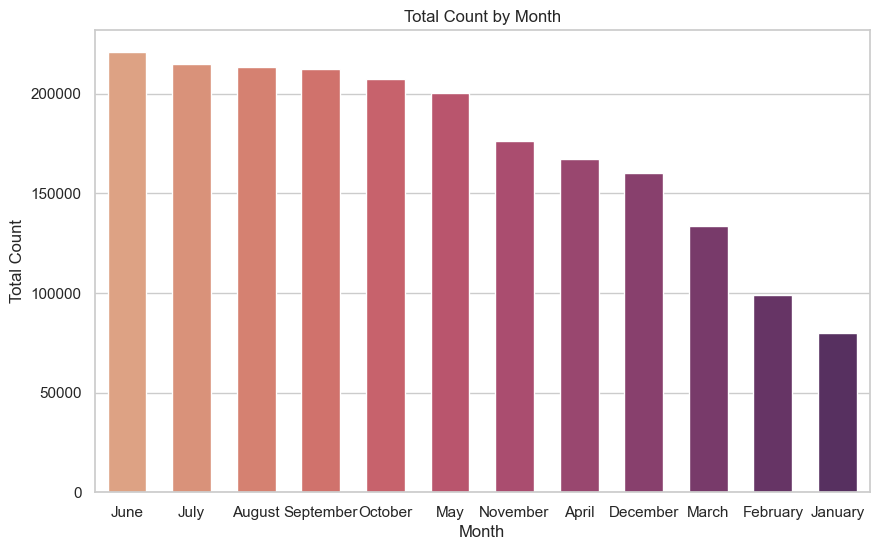

In [69]:
# rentals on monthly counts

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='count', data=monthly_count, palette='flare',width=0.6)
plt.title('Total Count by Month')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.show()

# Hypothesis Testing

Demand of Bicycles on rent is the same on Weekdays & Weekends